In [ ]:
# # the imports in this cell are required when running on local device
# import os, sys
# sys.path.append(os.path.join('..', '..'))
# from utils.applyML_util import train_classification, eval_classification
# from utils.featureSelection_util import (pearson_correlation_fs, 
#                                          seleckKBest_fs, selectSequential_fs)

In [2]:
# the imports in this cell are required when running from Cloud (Colab/Kaggle)
# before running on cloud you nee to upload the .py files 
# from 'Notebooks/utils' directory
from applyML_util import train_classification, eval_classification, showEvalutationGraph_classification
from featureSelection_util import (pearson_correlation_fs, 
                                   seleckKBest_fs, selectSequential_fs)

**AdaBoost Classifier Documentation link:** https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

In [4]:
# global random seed
RAND_SEED = 42

# initial model with only random seed and not any hyper-parametes
initial_model = AdaBoostClassifier(random_state=RAND_SEED)

# hyper-parameters

n_estimators = list(range(50,360,10))
learning_rate = np.arange(.1 , 1 , .1).tolist()

# dictonary of all hyperparameters

param_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate }

# variables needed for showEvalGraph_regression() function
MODEL_CLASS = AdaBoostClassifier

class_label = 'Rainfall'
x_axis_param_name = 'n_estimators'
x_axis_param_vals = n_estimators


## 1. Experimentation on the Weather Daily Dataset

In [5]:
# Load the train dataset
weather_daily_train_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/train/brri-weather_train_classification.csv')

# Load the test set
weather_daily_test_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/test/brri-weather_test_classification.csv')

### 1.0 No technique

In [ ]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_train_df, cls=class_label)
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

Selected hyperparameters: {'learning_rate': 0.8, 'n_estimators': 320}
Train set performance: accuracy=0.7399, macro-f1=0.5636


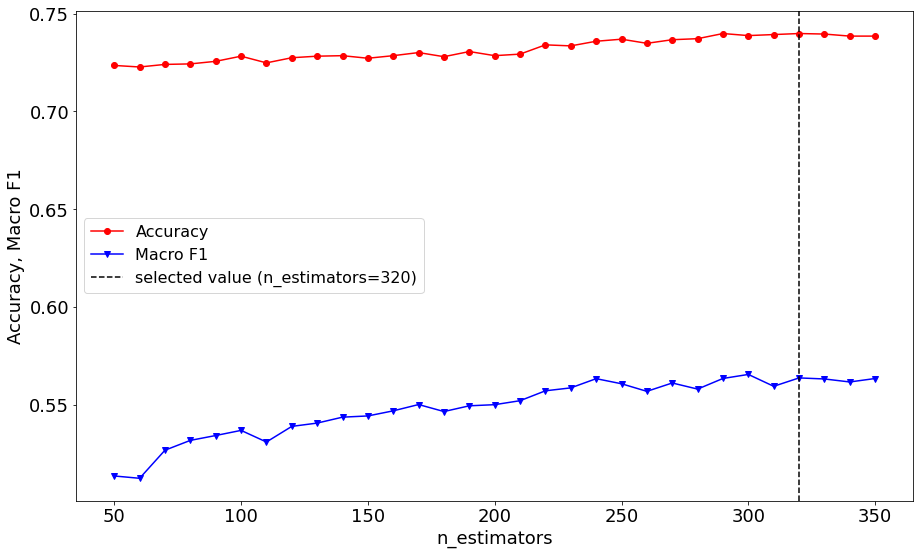

In [ ]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_train_df, cls=class_label, 
                                    x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                    selected_model_params=selected_model_params)

In [ ]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7513, macro-f1=0.5954


### 1.1 Apply Pearson Feature Selection to Daily Weather Dataset

In [8]:
# select features from the train dataset
weather_daily_fs1_train_df, cols_to_drop = pearson_correlation_fs(weather_daily_train_df, class_label)

# keep only selected features on the test dataset
weather_daily_fs1_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

dropping Sunshine (hour/day) from (Cloudy (hour/day), Sunshine (hour/day))


In [ ]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs1_train_df, cls=class_label)
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

Selected hyperparameters: {'learning_rate': 0.9, 'n_estimators': 340}
Train set performance: accuracy=0.7362, macro-f1=0.5702


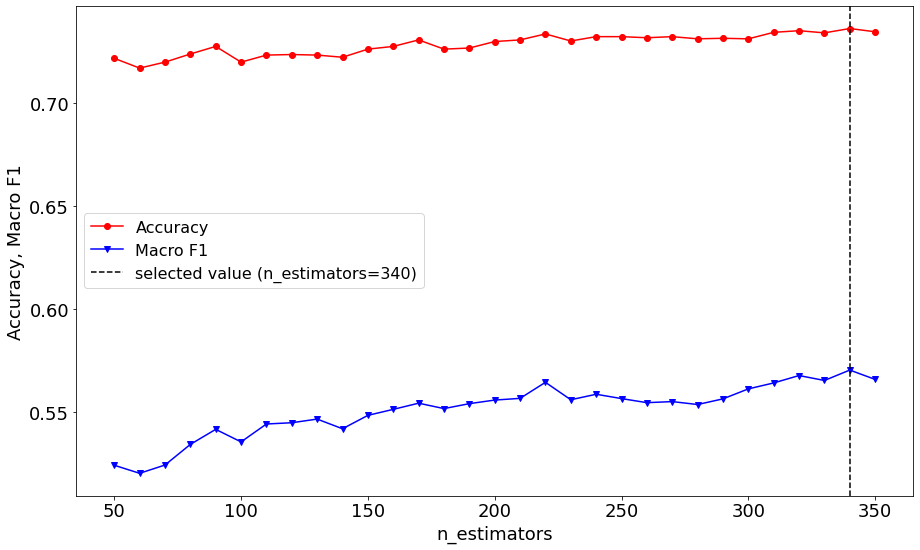

In [ ]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs1_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [ ]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs1_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7408, macro-f1=0.6098


### 1.2 Apply SelectKBest Feature Selection to Daily Weather Dataset

In [7]:
# select features from the train dataset
weather_daily_fs2_train_df, cols_to_drop = seleckKBest_fs(weather_daily_train_df, class_label, is_regression=True)

print('features dropped:', cols_to_drop)

# keep only selected features on the test dataset
weather_daily_fs2_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

features dropped: ['Max Temp. (degree Celcius)', 'Relative Humidity (morning, %)']


In [ ]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs2_train_df, cls=class_label)
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

Selected hyperparameters: {'learning_rate': 0.9, 'n_estimators': 290}
Train set performance: accuracy=0.7428, macro-f1=0.5693


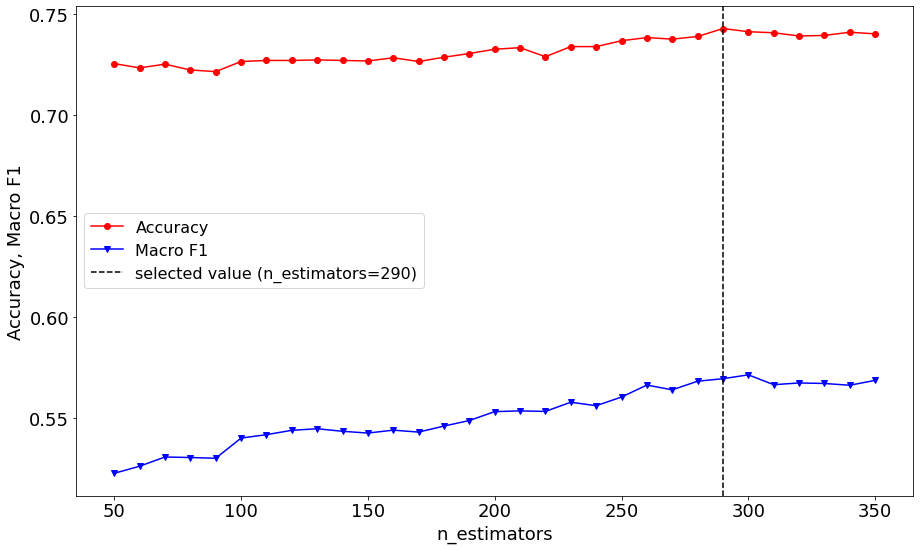

In [ ]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs2_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [ ]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs2_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7439, macro-f1=0.5978


### 1.3 SMOTE on Daily Dataset

In [ ]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_train_df, 
                                                                             cls=class_label, sampling_technique='smote')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {1: 2477, 0: 2477, 2: 2477}
Selected hyperparameters: {'learning_rate': 0.9, 'n_estimators': 350}
Train set performance: accuracy=0.7086, macro-f1=0.7084


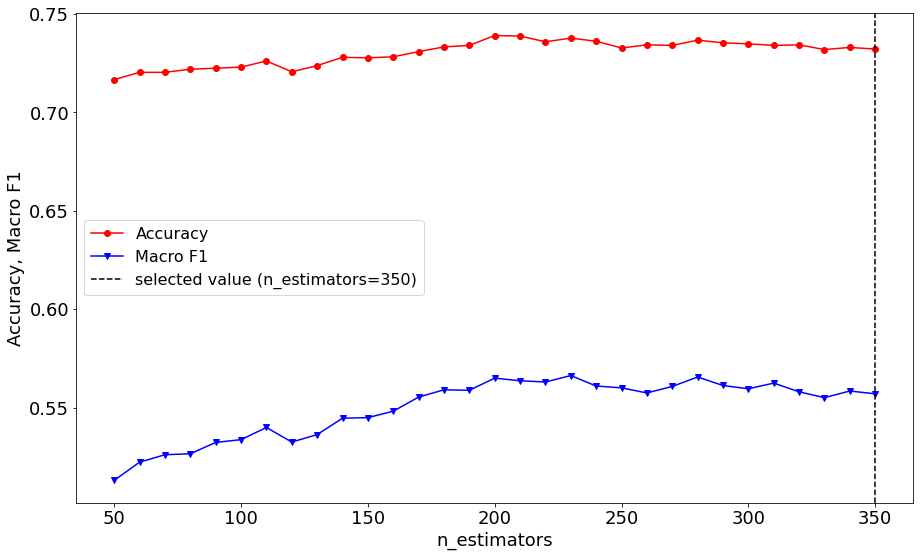

In [ ]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_train_df, cls=class_label, 
                                    x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                    selected_model_params=selected_model_params)

In [ ]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7071, macro-f1=0.5971


### 1.4 Random Undersampling + SMOTE on Daily Dataset

In [ ]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_train_df, 
                                                                             cls=class_label, sampling_technique='hybrid')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {0: 1981, 1: 1981, 2: 1981}
Selected hyperparameters: {'learning_rate': 0.8, 'n_estimators': 350}
Train set performance: accuracy=0.718, macro-f1=0.7191


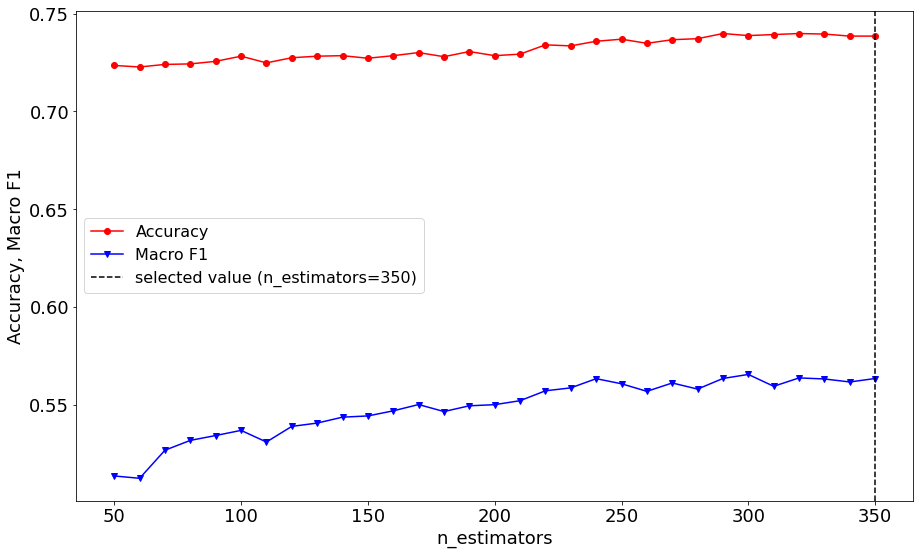

In [ ]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_train_df, cls=class_label, 
                                    x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                    selected_model_params=selected_model_params)

In [ ]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7144, macro-f1=0.6156


### 1.5 Pearson Feature Selection + Hybrid Sampling to Daily Weather Dataset

In [9]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs1_train_df, 
                                                                             cls=class_label, sampling_technique='hybrid')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {0: 1981, 1: 1981, 2: 1981}
Selected hyperparameters: {'learning_rate': 0.9, 'n_estimators': 290}
Train set performance: accuracy=0.7054, macro-f1=0.7064


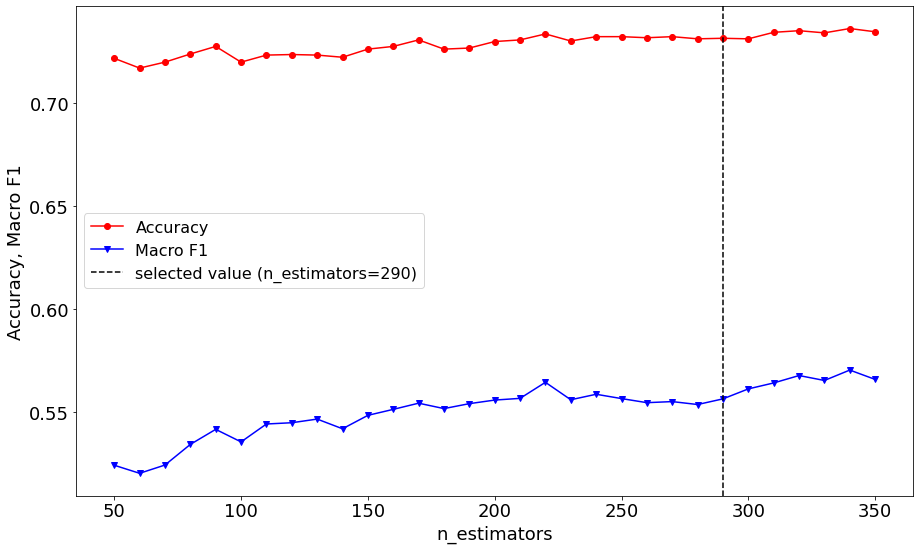

In [10]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs1_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [11]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs1_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7144, macro-f1=0.6175


### 1.6 SelecKBest Feature Selection + Hybrid Sampling to Daily Weather Dataset

In [ ]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs2_train_df, 
                                                                             cls=class_label, sampling_technique='hybrid')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {0: 1981, 1: 1981, 2: 1981}
Selected hyperparameters: {'learning_rate': 0.9, 'n_estimators': 300}
Train set performance: accuracy=0.7089, macro-f1=0.7092


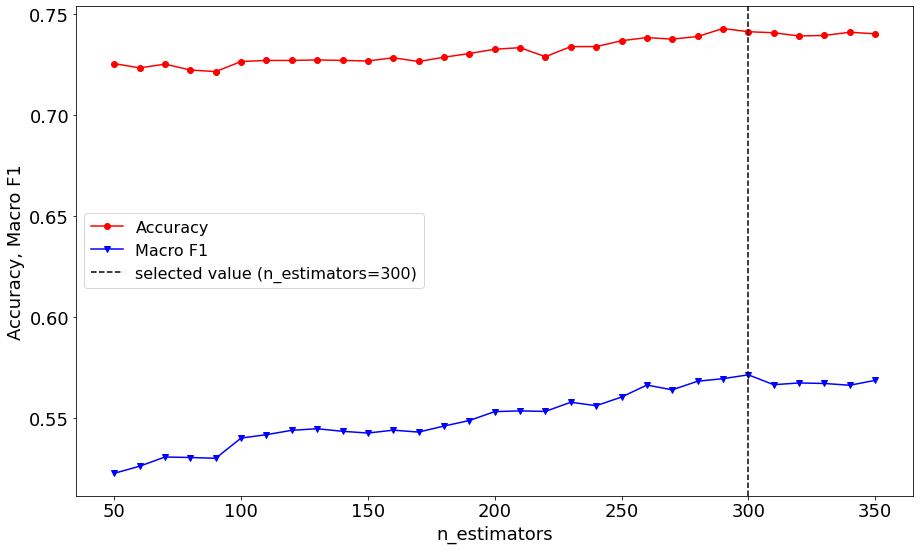

In [ ]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs2_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [ ]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs2_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7123, macro-f1=0.6049
